<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prerequisite-Reading" data-toc-modified-id="Prerequisite-Reading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prerequisite Reading</a></span></li><li><span><a href="#Frames-of-Reference-(Coordinate-Systems)" data-toc-modified-id="Frames-of-Reference-(Coordinate-Systems)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Frames of Reference (Coordinate Systems)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Nomenclature-for-vectors-expressed-in-different-frames-of-reference" data-toc-modified-id="Nomenclature-for-vectors-expressed-in-different-frames-of-reference-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Nomenclature for vectors expressed in different frames of reference</a></span></li></ul></li></ul></li><li><span><a href="#Transformations" data-toc-modified-id="Transformations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformations</a></span><ul class="toc-item"><li><span><a href="#Rotations:-expressing-one-frame's-unit-vectors-in-terms-of-another-frame's-unit-vectors" data-toc-modified-id="Rotations:-expressing-one-frame's-unit-vectors-in-terms-of-another-frame's-unit-vectors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rotations: expressing one frame's unit vectors in terms of another frame's unit vectors</a></span><ul class="toc-item"><li><span><a href="#Rotation-Matrix-Convention" data-toc-modified-id="Rotation-Matrix-Convention-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Rotation Matrix Convention</a></span></li><li><span><a href="#Inverse-Rotations" data-toc-modified-id="Inverse-Rotations-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Inverse Rotations</a></span></li><li><span><a href="#Representing-Rotations-in-Python-(in-2D)" data-toc-modified-id="Representing-Rotations-in-Python-(in-2D)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Representing Rotations in Python (in 2D)</a></span></li><li><span><a href="#Example:-Transforming-Robot-Velocity-from-local-to-global-coordinates" data-toc-modified-id="Example:-Transforming-Robot-Velocity-from-local-to-global-coordinates-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Example: Transforming Robot Velocity from local to global coordinates</a></span></li></ul></li><li><span><a href="#Translations" data-toc-modified-id="Translations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Translations</a></span></li></ul></li><li><span><a href="#Generalized-Transformations" data-toc-modified-id="Generalized-Transformations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generalized Transformations</a></span><ul class="toc-item"><li><span><a href="#Notation-for-expressing-one-frame-with-respect-to-another" data-toc-modified-id="Notation-for-expressing-one-frame-with-respect-to-another-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Notation for expressing one frame with respect to another</a></span></li><li><span><a href="#Generalized-mapping-of-a-vector-from-one-frame-to-another" data-toc-modified-id="Generalized-mapping-of-a-vector-from-one-frame-to-another-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Generalized mapping of a vector from one frame to another</a></span></li></ul></li></ul></div>

# Prerequisite Reading

To supplement your understanding of this material, you should read Section 2.4 of the [textbook](https://drive.google.com/file/d/1765a7bTY-nYGvFJMP41YahOQEy6gtGxN/view?usp=drive_link). The material presented here is based on that section, abridged and modified for ES302.

# Frames of Reference (Coordinate Systems)

Robots comprised of rigid links are said to have various "frames of reference." These are coordinate systems attached to various moving links on a robot. A robot will often have useful "frames" attached to each of its degrees of freedom (see Section 2.3 of the text).

Consider a mobile robot like a Romi that has a frame attached to its center of mass. Borrowing terminology from psychology, we will call this "base frame" for the Romi an "egocentric" frame. You will also commonly hear it called a "body-fixed" frame. The Romi can use cameras, distance sensors, LiDar sensors, etc. to perceive its environment relative to itself (ego) in this frame. Its motion (forward, backward, turns) is also easiest to describe in this frame.

Romi's environment can also be described in a perspective-invariant frame. You'll often hear this called a "fixed frame," or a "global frame," or a "Newtonian Frame." It's the frame in which you would think about the Romi if you were placing its location on a map, perhaps with the X direction pointing East and the Y direction pointing North. Again borrowing terminology from psychology, we will call this frame an "Allocentric" frame. Consider these two frames arranged as shown below.

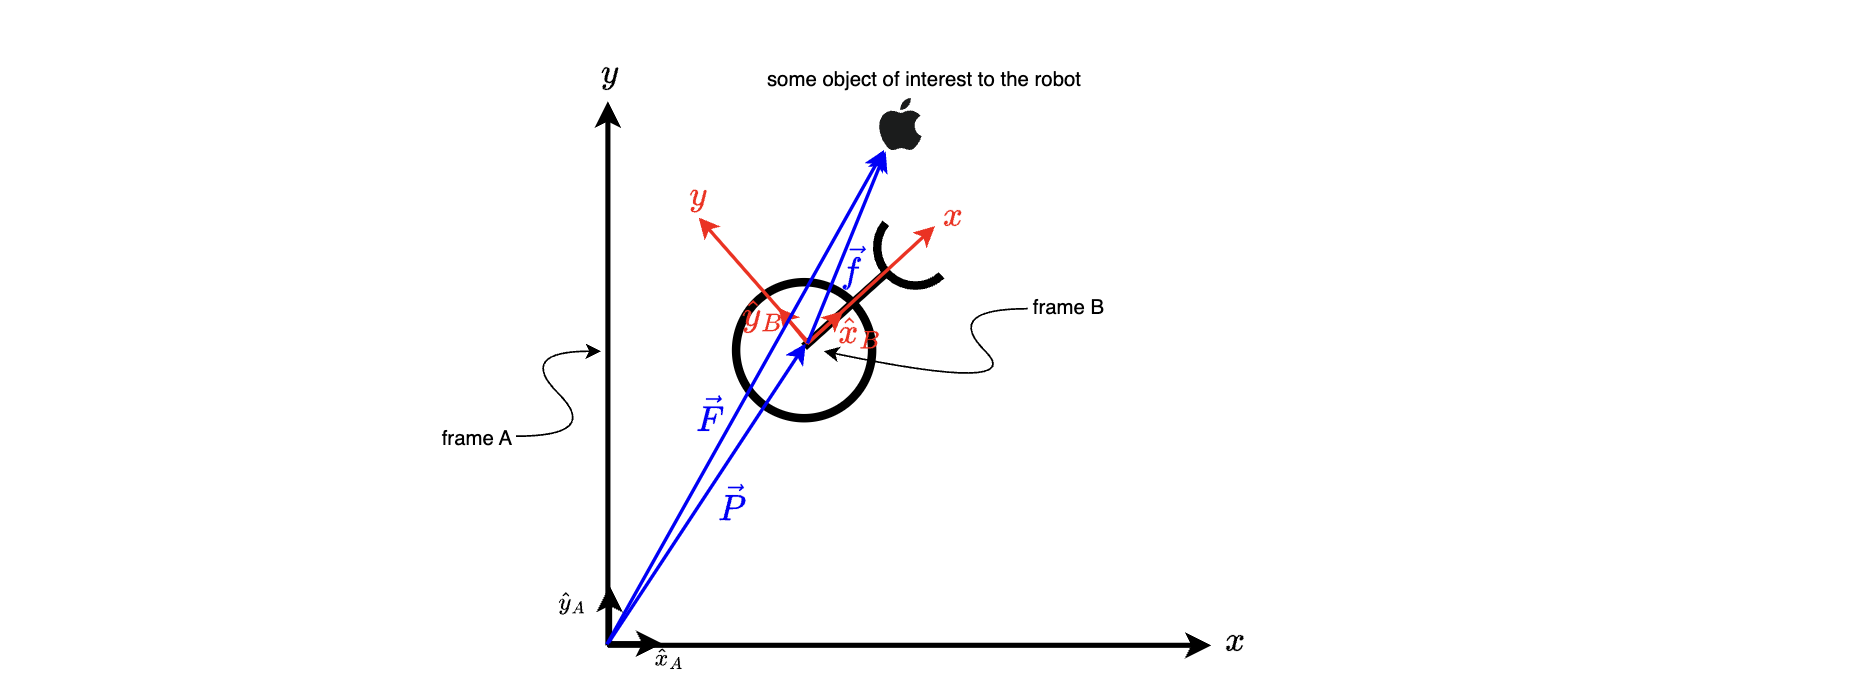

<p style="text-align:center"> <b>Figure 1: Allocentric (A) and Egocentric (B) frames</b> </p>

This figure shows an overhead view of a mobile robot moving around in its environment. Frame "A," or the allocentric frame, is a non-moving (or approximately non-moving) reference attached to "ground." Frame "B," the egocentric frame, translates and rotates as the robot moves along the ground. Each of these have unit vectors (denoted by the "hatted" x and y directions) that define the coordinate system's principle directions.

The vector $\vec{P}$ describes the position of the robot relative to the origin of the allocentric frame. The vector $\vec{F}$ represents the position of the fruit relative to the allocentric frame. The vector $\vec{f}$, represents the position of the fruit relative to the robot, which is probably how it would be "perceived" by the robot's sensors if the robot discovered the fruit. By the parallelogram law of vector addition, we could write that $\vec{P}+\vec{f}=\vec{F}$. 

But put yourself in the robot's shoes for a moment. The robot's "forward" direction $x$ in frame $B$ is different from the allocentric $x$ direction in frame $A$. So the robot "sees" the fruit as being mostly forward, and a little left, while when thinking about the position of the fruit in the allocentric frame of reference indicates that it is mostly "up," and a little bit to the "right." 

So that means that the fruit's position seems different depending on what *frame of reference* you use to describe it... and that's not something that the figure above is clear about. Is the vector $\vec{P}$ expressed in the allocentric frame A, or the egocentric frame B, for example?

The answer is that it is possible to express any of the vectors shown in the figure above in *either* fram A or frame B. For example, if the robot's job is mapping, it will need to use its own position and orientation to transform its measurement (using sensors) of the fruit's position into allocentric coordinates so that they can be stored in a common reference frame that doesn't change as the robot does its job.

We can describe any position vector in any frame of reference, but it's important to be clear about *which* frame of reference we're using when we write a vector.

**The goal of this notebook is to understand how to write and compute the position of the "apple" from either a "global" perspective or from the "Romi's" perspective.**

### Nomenclature for vectors expressed in different frames of reference

Every group needs a common language to communicate with one another. For us, We will use the following nomenclature when expressing a vector quantity in a particular frame of reference.


$^A\vec{P} = \begin{bmatrix}^Ax_p & ^Ay_p & ^Az_p \end{bmatrix}^T$ represents the vector $\vec{P}$ expressed in the coordinates of frame "A."

$^B\vec{P} = \begin{bmatrix}^Bx_p & ^By_p & ^Bz_p \end{bmatrix}^T$ represents the vector $\vec{P}$ expressed in the coordinates of frame "B."

Note that although both of these represent *the same vector quantity*, the $x_p,y_p,z_p$ scalar coordinates will *not* be the same between these two representations! The preceding superscript in front of each is meant to indicate which frame each magnitude is expressed in. 

Note that we can also write our vectors in terms of each frame's unit vectors. Take $^A\vec{P}$ for example:

\begin{equation}
\begin{aligned}
^A\vec{P} &=& ^Ax_p &\hat{x}_A &+& ^Ay_p &\hat{y}_A &+& ^Az_p &\hat{z}_A \\
&=& ^Ax_p &\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} &+& ^Ay_p &\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} &+& ^Az_p &\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}
\end{aligned}
\end{equation}

This might seem like a lot of extra notation for something so simple, but it protects us from miscommunication because often, we would like to express a vector that is *measured* in one frame in a *totally different* frame. Imagine having a camera on the end of the Romi robot's arm, which might have several frames connected by joints, all pointing in different directions. If we needed to take meaurements from that camera and transform them *all the way back* into a global, allocentric coordinate system, we need to be very clear about what we're up to!

The key to doing this type of *transformation* between coordinate frames is *expressing one frame's unit vectors in terms of another frame's unit vectors,* which is called a *rotation*, and expressing the offset between the *origins* of the two frames, which is called a *translation*. Together, a translation and a rotation allow us to perform a *transformation* that expresses a vector of interest originally written in one frame in terms of another frame. 

# Transformations

## Rotations: expressing one frame's unit vectors in terms of another frame's unit vectors

If I wanted to represent the unit vector $\hat{x}_B$ in terms of frame A's unit vectors $\hat{x}_A,\hat{y}_A, \hat{z}_A$, I am performing what is called a *rotation*. I can denote this as follows:
$^A\hat{x}_B$
Which indicates that although I'm talking about the $x$ unit vector in frame $B$, I'm expressing it in terms of $A$'s coordinates. Let's see how this is possible for a simple two-dimensional rotation. Imagine that the third unit vector for each coordinate system, $\hat{z}$, follows the right-hand rule and is thus pointing straight out of the page for both frame $A$ and frame $B$.

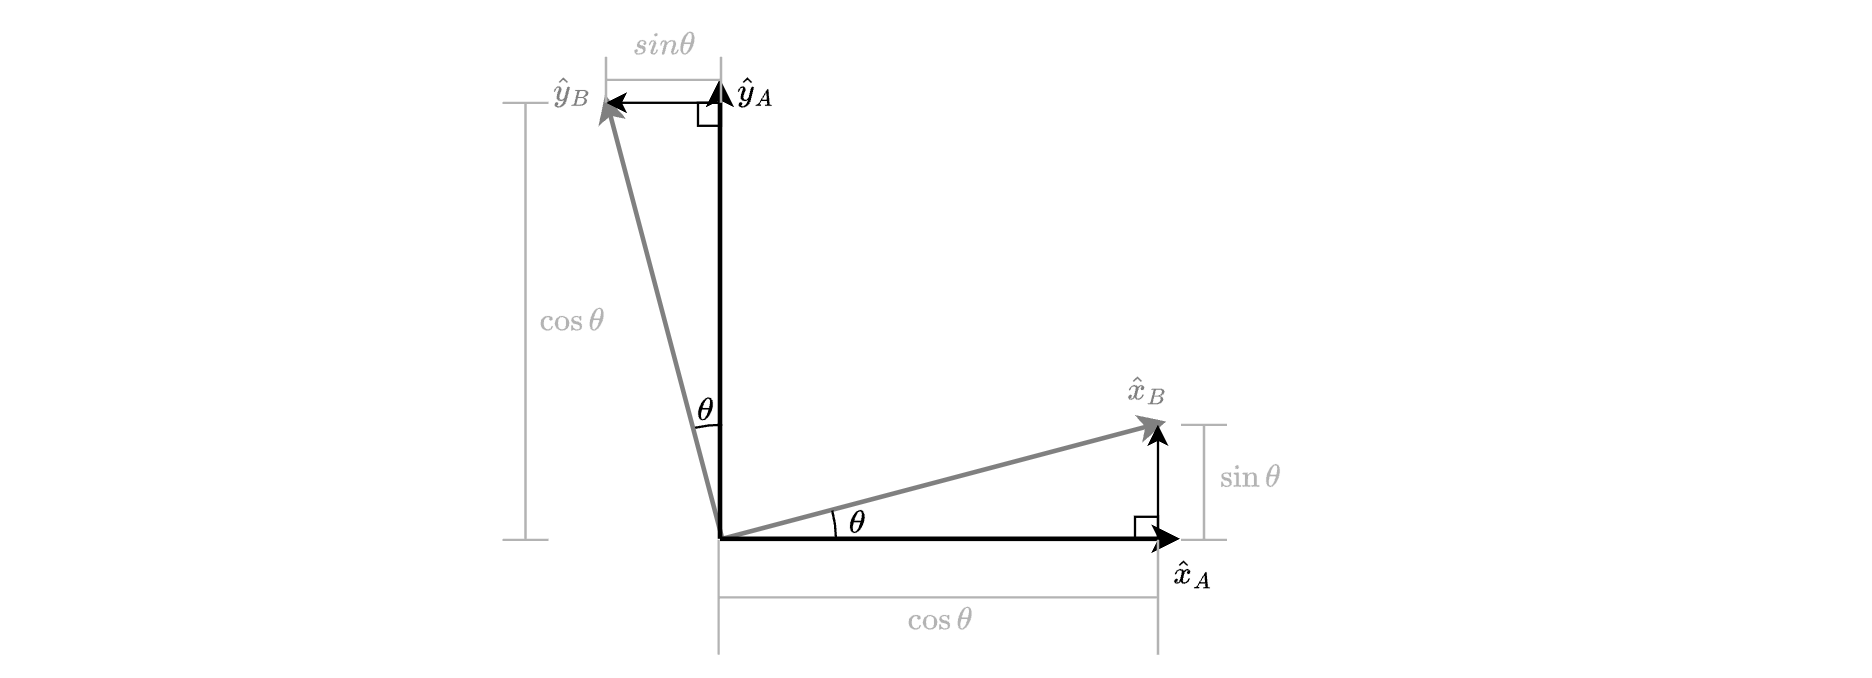

<p style="text-align:center"> <b>Figure 2: Expressing $B$'s unit vectors in terms of $A$</b> </p>

The idea here is to place the two frames' unit vectors at the same origin, and then write a "tip to tail" vector addition equation in terms of frame A's unit vectors that leads to the tip of the unit vector $\hat{x}_B$. Remember that we are talking about *unit vectors* here, so their overall length is 1.

\begin{equation}
\hat{x}_B = \cos\theta \hat{x}_A + \sin\theta\hat{y}_A
\end{equation}

Similarly, for the $\hat{y}_B$ direction, we can write:

\begin{equation}
\hat{y}_B = -\sin\theta \hat{x}_A + \cos\theta\hat{y}_A
\end{equation}

The $\hat{z}_A$ and $\hat{z}_B$ vectors are coincident and colinear, and in the same direction because our "2-D" or "planar" rotation was *about* the $\hat{z}$ axis. So,
\begin{equation}
\hat{z}_B = \hat{z}_A
\end{equation}

This transformation can actually be written compactly as a vector-matrix equation in 2D:
\begin{equation}
\underbrace{\begin{bmatrix}\hat{x}_B \\ \hat{y}_B \end{bmatrix}}_{\{B\}} = \underbrace{\begin{bmatrix} \cos\theta & \sin\theta \\ -\sin\theta & \cos\theta  \end{bmatrix}}_{^A_BR_z(\theta)} \underbrace{\begin{bmatrix} \hat{x}_A \\ \hat{y}_A \\ \end{bmatrix}}_{\{A\}}
\end{equation}

Or, in 3D, we merely need to include a row for the $z$ axis of each frame, resulting in an extra row and column in the rotation matrix.

\begin{equation}
\underbrace{\begin{bmatrix}\hat{x}_B \\ \hat{y}_B \\ \hat{z}_B \end{bmatrix}}_{\{B\}} = \underbrace{\begin{bmatrix} \cos\theta & \sin\theta & 0 \\ -\sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}}_{^A_BR_z(\theta)} \underbrace{\begin{bmatrix} \hat{x}_A \\ \hat{y}_A \\ \hat{z}_A\end{bmatrix}}_{\{A\}}
\end{equation}

Notice that here, we are denoting the vector of directions for frame $A$ as $\{A\}$, and likewise with frame $B$'s directions, $\{B\}$.

### Rotation Matrix Convention

We call $_B^AR_z(\theta)$ a *rotation matrix*. We read its preceding subscript and superscript as transforming *from* the unit bectors in frame $B$ *to* the unit vectors of frame $A$. We read its trailing subscript as a rotation *about* the $z$-axis of the "from" frame, which in this case was $B$. Finally, we read that this rotation matrix is a function of the rotation angle, which in this case we called $\theta$. 

It's easy to find this notation confusing... but remember that for a vector, the superscript indicate "whose perspective" the vector is in (e.g. $^A\vec{P}$) and the same convention applies to our rotation matrix. The superscript indicates whose perspective we are transforming *into.*

### Inverse Rotations

We could, if we wanted to, do the inverse of what we did in the prior subsection. We could write the unit vectors for coordinate system $A$ in terms of the unit vectors of coordinate system $B$, shown graphically below.
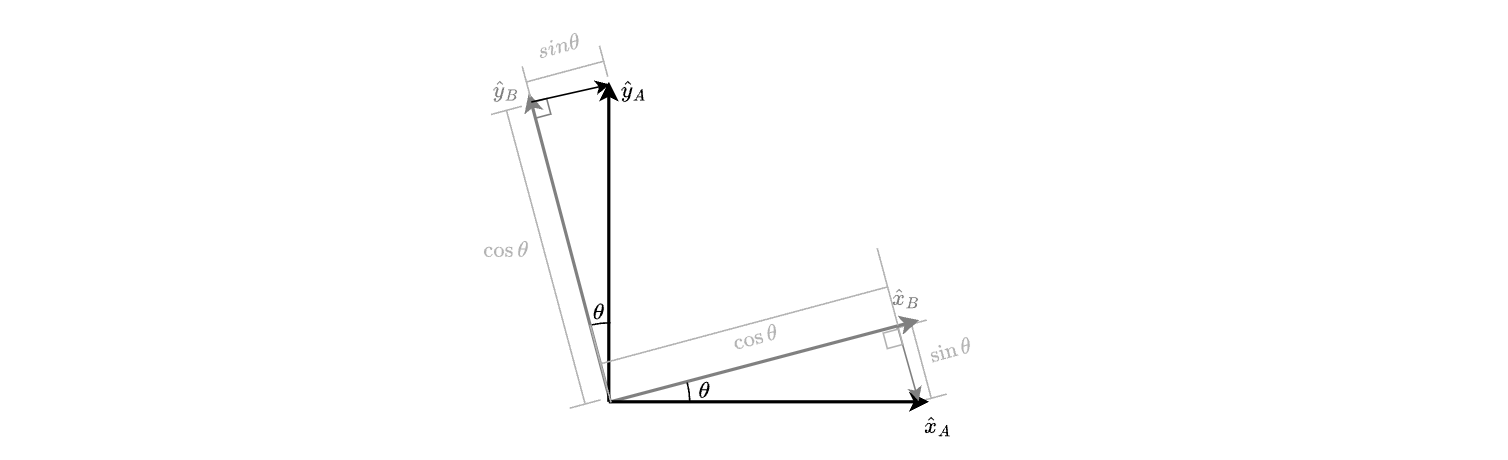

<p style="text-align:center"> <b>Figure 3: Expressing $A$'s unit vectors in terms of $B$</b> </p>

If we used the same strategy as before, writing vector-addition equations for each of the frame $A$ unit vectors in terms of components in the $B$ frame, we would see that this rotation matrix is a little different. The vector-matrix form of the rotation equations is given below for the 2D case:
\begin{equation}
\underbrace{\begin{bmatrix}\hat{x}_A \\ \hat{y}_A  \end{bmatrix}}_{\{A\}} = \underbrace{\begin{bmatrix} \cos\theta & -\sin\theta  \\ \sin\theta & \cos\theta   \end{bmatrix}}_{^B_AR_z(\theta)} \underbrace{\begin{bmatrix} \hat{x}_B \\ \hat{y}_B \end{bmatrix}}_{\{B\}}
\end{equation}

Or, for the 3D case:
\begin{equation}
\underbrace{\begin{bmatrix}\hat{x}_A \\ \hat{y}_A \\ \hat{z}_A \end{bmatrix}}_{\{A\}} = \underbrace{\begin{bmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}}_{^B_AR_z(\theta)} \underbrace{\begin{bmatrix} \hat{x}_B \\ \hat{y}_B \\ \hat{z}_B\end{bmatrix}}_{\{B\}}
\end{equation}

What you'll notice is that mathematically, this Rotation matrix $^B_AR_z(\theta)$ is the *inverse* of $^A_BR_z(\theta)$. This is because If I wrote:

\begin{equation}
\{B\} = _A^BR_z(\theta)\{A\}
\end{equation}

and I wanted to solve for $\{A\}$ instead, I could simply pre-multiply both sides of the equation by the inverse of my rotation matrix $R$:

\begin{equation}
\begin{aligned}
_A^B R_z( \theta)^{-1}\{B\} &=  \underbrace{_A^B R_z( \theta )^{-1}\cdot _A^BR_z(\theta)}_{\mathbb{I}_{3x3}}\{A\} \\
_A^BR_z(\theta)^{-1}\{B\} &= \{A\} \\
_B^AR_z(\theta)\{B\}&=\{A\}
\end{aligned}
\end{equation}

You can confirm that the inverses work out for our two examples above on your own using the formula for the [inverse](https://www.cuemath.com/algebra/inverse-of-3x3-matrix/) of a 3x3 matrix for the 3D case, or using the [2x2 inverse](https://www.cuemath.com/algebra/inverse-of-2x2-matrix/) for the 2D case.

But it gets better. Because each of the columns of a matrix expresses a unit vector, of a few key properties of rotation matrices, mainly that a rotation matrix $R$ forms an "orthonormal basis," the inverse of a rotation matrix is *equivalent to its transpose!*. In other words, we don't have to do anything wild or complicated to find an inverse rotation matrix. We can simply write:
\begin{equation}
^A_BR(\theta)=^B_AR(\theta)^T
\end{equation}
That's right. Inverse rotation matrices are simply *transposes* of one another. Pretty cool! Pretty easy!

### Representing Rotations in Python (in 2D)

Representing Rotations in the Python language is relatively easy with the numpy library. See the example function below, which creates a 2D rotation matrix using a single angle $\theta$. 

In [59]:
import numpy as np
def create2DRotationAB(theta):
    """ Create a 2D rotation matrix AB_R (R from A to B ) to express the unit vectors of coordinate system B
        in terms of the unit vectors of coordinate system B.
        If you wish to do the opposite (transform unit vectors of A into B's coordinates), you can invert/transpose this matrix.
        The angle you feed this function should be in RADIANS.

        note that the matrix equation here is [xhatb,yhatb]' = R*[xhata,yhata]' where ' represents transpose.
    """
    return np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])

### Example: Transforming Robot Velocity from local to global coordinates

Let's use this function to create a 0.2-radian rotation matrix in 2D. Imagine that our robot knows that its "yaw" angle (angle about the gravitational axis) with respect to a global XY frame is 0.2 radians, for example. If the robot knows its *local* velocity (for example, 2 m/s forward in its local x-direction), we can use this transformation to determine the robot's *global* velocity (east as X, and Y as north, for example). We need to write:

\begin{equation}
^A\vec{v}=_B^AR ^B\vec{v}
\end{equation}

Note that because the function is written as a transform from frame A to frame B, which means taking a vector originally expressed in A's unit vectors and then transforming them to be expressed in B's unit vectors, we actually need the *inverse* of the rotation the function gives us, since $^B\vec{v}$, the velocity we want to transform, is in B's unit vectors already, and needs to be expressed in terms of A's unit vectors.

In [57]:
theta = 0.2 #angle about which we will rotate in a plane
AB_R = create2DRotation(theta) #creates expression in A's frame of B's unit vectors (transforms from A to B)
BA_R = AB_R.T #transpose of the rotation creates an expression in B's frame of A's unit vectors (transforms from B to A)
print(BA_R)

[[ 0.98006658 -0.19866933]
 [ 0.19866933  0.98006658]]


Now, knowing that the robot's velocity in its "local" coordinate frame is $^B\vec{v}=\begin{bmatrix} 1 \\ 0 \end{bmatrix}$, we can compute its *global* velocity using our rotation matrix by computing 
\begin{equation}
^A\vec{v}=_B^AR ^B\vec{v}
\end{equation}

In [44]:
#create a "tall" vector representing our local robot velocity
vlocal = np.array([[2],[0]])
#use the rotation equation to transform that velocity into global (X east, Y north) coordinates. 
#Note the use of the numpy "dot" equation, which does matrix multiplication.
vglobal = np.dot(BA_R,vlocal)
#display the global velocity
print(vglobal)

[[1.96013316]
 [0.39733866]]


Note that because the robot is only angled 0.2 radians (about 12 degrees) from the "east" X axis, its global velocity is "mostly" East (X), with "just a little" North (Y). We can confirm that our rotation worked visually by looking at the figure below, which shows the two frames and the vector $\vec{v}$. 

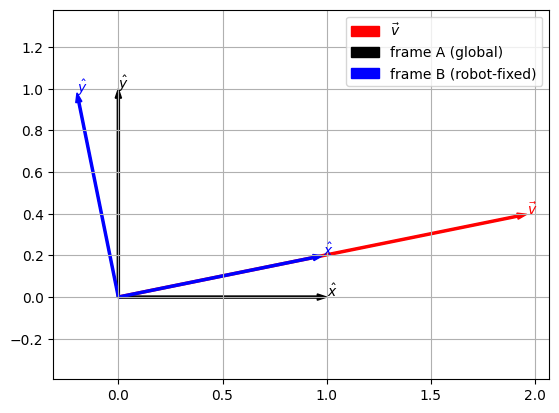

In [58]:
from matplotlib.pyplot import *
rcParams['text.usetex'] = False

def drawAxis(myorigin,rotation,mycolor,mylabel):
    arrow(myorigin[0],myorigin[1],rotation[0,0],rotation[0,1],color=mycolor,width=0.01,label=mylabel,length_includes_head=True)
    arrow(myorigin[0],myorigin[1],rotation[1,0],rotation[1,1],color=mycolor,width=0.01,length_includes_head=True)
    text(myorigin[0]+rotation[0,0],myorigin[1]+rotation[0,1],r'$\hat{x}$',color=mycolor)
    text(myorigin[0]+rotation[1,0],myorigin[1]+rotation[1,1],r'$\hat{y}$',color=mycolor)

def drawVector(myorigin,rotation,howlong,mycolor,mylabel,mywidth=0.01):
    arrow(myorigin[0],myorigin[1],howlong*rotation[0,0],howlong*rotation[0,1],color=mycolor,width=mywidth,label=mylabel,length_includes_head=True)
    text(myorigin[0]+howlong*rotation[0,0],myorigin[1]+howlong*rotation[0,1],mylabel,color=mycolor)

    
f= figure()
origin=np.array([0,0])
drawVector(origin,AB_R,2.0,'r',r'$\vec{v}$')
drawAxis(origin,eye(2),'k','frame A (global)')
drawAxis(origin,AB_R,'b','frame B (robot-fixed)')
axis('equal')
legend()
grid('minor')
show()

<p style="text-align:center"> <b>Figure 4: A velocity vector in both Allocentric (A) and Egocentric (B) frames</b> </p>

## Translations

Looking back at Figure 1, we can see that even if we can represent the vector $\vec{f}$, which points to an "apple" that Romi found, in either frame $A$ or frame $B$, and even though we can use a rotation to transform this vector so that it is in terms of either $A$'s unit vectors or $B$'s unit vectors, note that frame $B$'s origin is not coincident with frame $A$'s origin, as we drew in Figures 2 and 3. This means that along with a *rotation*, truly transforming $\vec{f}$ from one coordinate system to another also requires accounting for this offset between the two frames' origins, at least if the vector is a *position* vector.

This is called a *Translation.* If we originally knew $^B\vec{f}$, which means that the vector was expressed in the body-fixed frame $B$, and we wanted to know where the "apple" would lie on a "Map" expressed in coordinate system $A$, We actually want to compute the vector $^A\vec{F}$. We can write $^A\vec{F}$ as a function of vectors $\vec{P}$ and $\vec{f}$. Assuming that what the Romi measures is $^B\vec{f}$, and that it's most convenient to express $^A\vec{P}$, perhaps from a "GPS" style sensor that measures Romi's "global" position, We can write the position of the apple as a combination of a translation and a rotation, given Romi's "local" measurement of the apple's position:

\begin{equation}
^A\vec{F} = ^A\vec{P} + ^A_BR_z(\theta)^B\vec{f}
\end{equation}

# Generalized Transformations

## Notation for expressing one frame with respect to another

Generalizing what we saw in Section 3, we can make the statement that a vector quantity can be transformed from one coordinate system to another using a combination of a translation and a rotation. If we want to express this compactly, we can say that the frame $B$ can be expressed relative to (rather from the perspective of) frame $A$ by expressing the translation and rotation as a set:

\begin{equation}
\{B\} = \left\{ _B^AR, ^AP \right\}
\end{equation}

Where, in general, $^AP$ represents the vector from the *origin* of frame $A$ to the *origin* of frame $B$ expressed in $A$'s coordinates, and the rotation vector $_B^AR$ represents the rotation *from* $A$ *to* $B$ (enabling us to write $B$'s unit vectors in terms of $A$'s unit vectors).

## Generalized mapping of a vector from one frame to another



Equation 10 provides an example of how we can combine a rotation and a translation to express a vector in one "frame" with respect to another "frame." **In Section 2.4.2 of the textbook,** the authors generalize this assuming that if two frames lie in space, and $^A\vec{P}$ is the location of frame $B$ with respect to frame $A$, then any vector $Q$ originally expressed in frame $B$ can be transformed to a representation writh respect to frame $A$ according to:

\begin{equation}
^A\vec{Q} = ^A\vec{P} + ^A_B R ^B\vec{Q}
\end{equation}

Note that unlike Equation 10, the rotation matrix $R$ here isn't about any particular axis and isn't a rotation by any particular angle. It can actually even be a *composite* of many rotations, as we'll see in a minute, so we will just leave those specifics out of this general equation.

We can actually write this even more compactly as a single vector-matrix equation. This requires adding a row to the position vectors, and adding a row and a column to a new "Transformation Matrix" $T$. Shown for a 2D system below, we have:

